In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [129]:
df = pd.read_csv("C:/Users/sruja/Downloads/telecom.csv")  # filename path




In [130]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [131]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [132]:
from sklearn.preprocessing import LabelEncoder
import joblib

encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

joblib.dump(encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [133]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']


In [134]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [136]:
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7647476901208244
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.56      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



In [137]:
joblib.dump(xgb, "xgb_churn_model.pkl")

['xgb_churn_model.pkl']

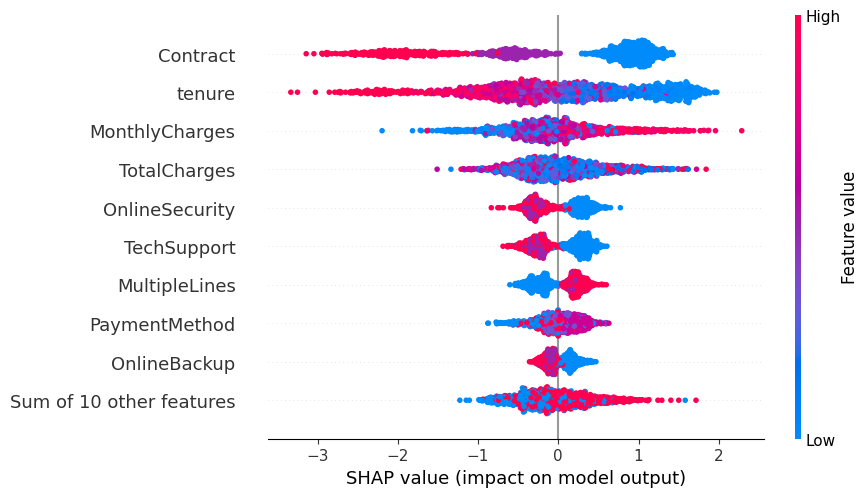

In [138]:
# --- SHAP EXPLAINABILITY BLOCK ---
import shap
import pandas as pd
import joblib

# Load trained model
model = joblib.load("xgb_churn_model.pkl")

# Reload test data without labels
X_test = pd.read_csv("churn_predictions1_for_powerbi.csv").drop(columns=['Actual_Churn', 'Predicted_Churn'])

# Drop customerID if present
X_test = X_test.drop(columns=['customerID'], errors='ignore')

# Initialize SHAP explainer (CPU-safe)
explainer = shap.Explainer(model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Global explanation plot
shap.plots.beeswarm(shap_values)


In [139]:
df_test = X_test.copy()
df_test['Actual_Churn'] = y_test
df_test['Predicted_Churn'] = y_pred
df_test.to_csv("churn_predictions1_for_powerbi.csv", index=False)

In [140]:
import shap
explainer = shap.Explainer(model, X_train)  # or X_test if more convenient
joblib.dump(explainer, "shap_explainer.pkl")


['shap_explainer.pkl']